# Regression on Petrol Dataset

## Importing libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load dataset

In [54]:
df = pd.read_csv('petrol_consumption (1).csv')

## Perform EDA

In [55]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [56]:
df.isna().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

No null values to be removed

In [57]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


Text(0, 0.5, 'Petrol Consumption')

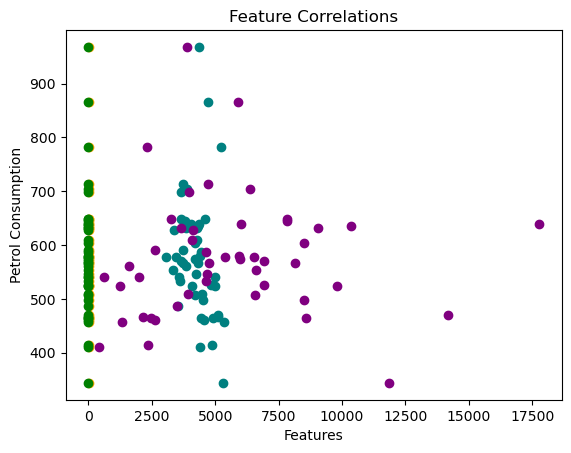

In [58]:
plt.scatter(df['Average_income'], df['Petrol_Consumption'], color='teal')
plt.scatter(df['Paved_Highways'], df['Petrol_Consumption'], color='purple')
plt.scatter(df['Petrol_tax'], df['Petrol_Consumption'], color='orange')
plt.scatter(df['Population_Driver_licence(%)'], df['Petrol_Consumption'], color='green')
plt.title('Feature Correlations')
plt.xlabel('Features')
plt.ylabel('Petrol Consumption')

## Construct matrix of features and output vector

In [59]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Perform train-test split

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Perform scaling on inputs

In [45]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# sc_test = StandardScaler()
# x_test = sc_test.fit_transform(x_test)

## Training Decision Tree Regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)
y_pred = dt_regressor.predict(x_test)

In [69]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", (mean_absolute_error(y_test, y_pred)))

Mean Absolute Error:  82.93333333333334


## Training Linear Regressor

In [70]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(x_train, y_train)
y_pred_lin = lin_regressor.predict(x_test)

In [71]:
print("Mean Absolute Error: ", (mean_absolute_error(y_test, y_pred_lin)))

Mean Absolute Error:  63.02652446557458
